# Deep Neural Network (DNN)
### Goal of lesson
- Understand Deep Neural Network (DNN)
- How algorithms calculate weights in DNN
- Show tools to visually understand what DNN can solve

### What is Deep Neural Network
- The adjective "deep" in deep learning refers to the use of multiple layers in the network ([Wiki](https://en.wikipedia.org/wiki/Deep_learning)).
- Usually having two or more hidden layers counts as deep.

<img src="img/dnn_example-2.png" width="600" align="left">

### Backpropagation
- Algorithm for training neural networks with hidden layers
- Algorithm
    - Start with a random choice of weights
    - Repeat
         - Calculate error for output layer
         - For each layer - starting with output layer
             - Propagate error back one layer
             - Update weights
         

### Overfitting
- Fit too close to training data and not generalize well

### Dropout
- Temporarily remove units - selectat random - from a neural network to prevent over reliance on certain units
- Dropout value of 20%-50%
- Better performance when dropout is used on a larger network
- Dropout at each layer of the network has shown good results.
- [Original Paper](https://jmlr.org/papers/v15/srivastava14a.html)


<img src="img/dnn_example-3.png" width="600" align="left">

### Tensorflow
- Ideas: No hidden layer -> only straight line. Hidden layer -> XOR function and more
- https://playground.tensorflow.org/


> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from [**sklearn**](https://scikit-learn.org/stable/)
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.
>     - [**Dropout**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies Dropout to the input

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('files/xor.csv')
data.head()

,x,y,class id
0,0.743986,-1.413632,1
1,-3.915247,1.634048,1
2,0.470328,4.048055,0
3,-1.197252,3.975475,1
4,-3.910402,-4.284134,0


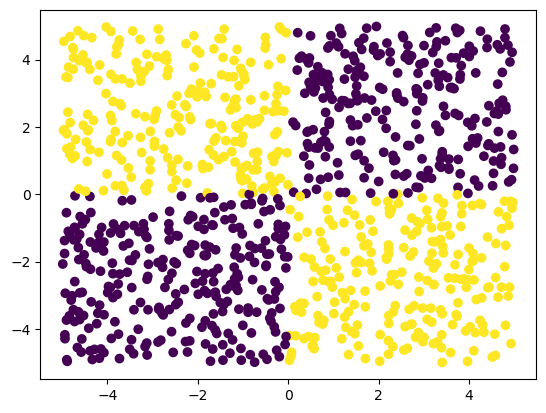

In [3]:
fig, ax = plt.subplots()

ax.scatter(x=data['x'], y=data['y'], c=data['class id'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'y']], data['class id'], random_state=42)

In [5]:
accuracies = []

for i in range(5):
    tf.random.set_seed(i)
    
    model = Sequential()
    model.add(Dense(6, input_dim=2, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(4, activation='relu'))
    # model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))
   
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test)
    accuracies.append(accuracy*100)
    
sum(accuracies)/len(accuracies)

8/8 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9920


99.0399980545044

In [6]:
data = pd.read_csv('files/xor_dirty.csv')
data.head()

,x,y,class id
0,3.733331,1.919983,0
1,0.515793,-3.900202,1
2,-2.713858,-0.145212,0
3,-3.850508,-2.644217,0
4,-0.060261,2.564358,1


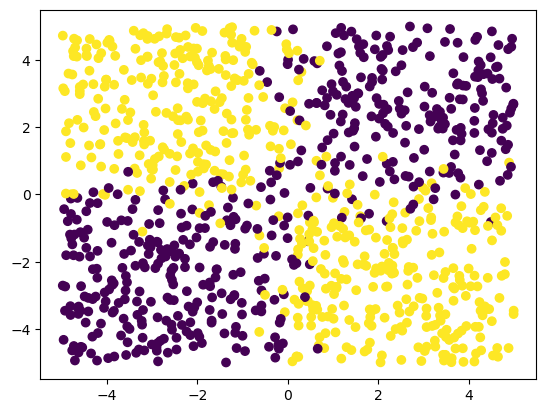

In [7]:
fig, ax = plt.subplots()

ax.scatter(x=data['x'], y=data['y'], c=data['class id'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'y']], data['class id'], random_state=42)

In [9]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
_, accuracy = model.evaluate(X_test, y_test)
accuracy


8/8 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9280


0.9279999732971191